In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('SalaryData_Test(1).csv')
test_data = pd.read_csv('SalaryData_Train(1).csv')

In [3]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
print(train_data.shape)
print(test_data.shape)

(15060, 14)
(30161, 14)


In [6]:
sorted(train_data['Salary'].unique())

[' <=50K', ' >50K']

In [7]:
train_data['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [8]:
train_data.drop(['sex','relationship','educationno'],axis=1,inplace=True)
test_data.drop(['sex','relationship','educationno'],axis=1,inplace=True)

In [9]:
train_data.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
race             object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
test_data.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
race             object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
race             0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
race             0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [12]:
# checking and identifying non-numeric columns (same for both train_data and test_data)
cols = []
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        cols.append(i)
cols

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'race',
 'native',
 'Salary']

In [13]:
num = train_data.select_dtypes(include = ['int','float'])
num  
print(num.columns)

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')


In [14]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

In [15]:
print(train_data.dtypes)
print()
print(test_data.dtypes)

age              int64
workclass        int32
education        int32
maritalstatus    int32
occupation       int32
race             int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

age              int64
workclass        int32
education        int32
maritalstatus    int32
occupation       int32
race             int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object


In [16]:
train_data.corr()

,age,workclass,education,maritalstatus,occupation,race,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,-0.262577,-0.002214,0.024485,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,-0.031329,0.021271,0.059749,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,-0.043117,-0.023999,0.012133,0.028626,0.020568,0.062892,0.077065,0.085554
maritalstatus,-0.262577,-0.031329,-0.043117,1.000000,0.003854,-0.073718,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.003854,1.000000,-0.001561,0.014165,0.016580,0.011755,-0.001311,0.046218
race,0.024485,0.059749,0.012133,-0.073718,-0.001561,1.000000,0.013539,0.015799,0.037125,0.125514,0.069227
capitalgain,0.078760,0.032980,0.028626,-0.042405,0.014165,0.013539,1.000000,-0.031876,0.090501,0.005923,0.220882
capitalloss,0.057745,0.010242,0.020568,-0.034073,0.016580,0.015799,-0.031876,1.000000,0.057712,-0.001008,0.145967
hoursperweek,0.102758,0.052614,0.062892,-0.171665,0.011755,0.037125,0.090501,0.057712,1.000000,0.005877,0.222665
native,-0.005683,-0.003635,0.077065,-0.016532,-0.001311,0.125514,0.005923,-0.001008,0.005877,1.000000,0.014056


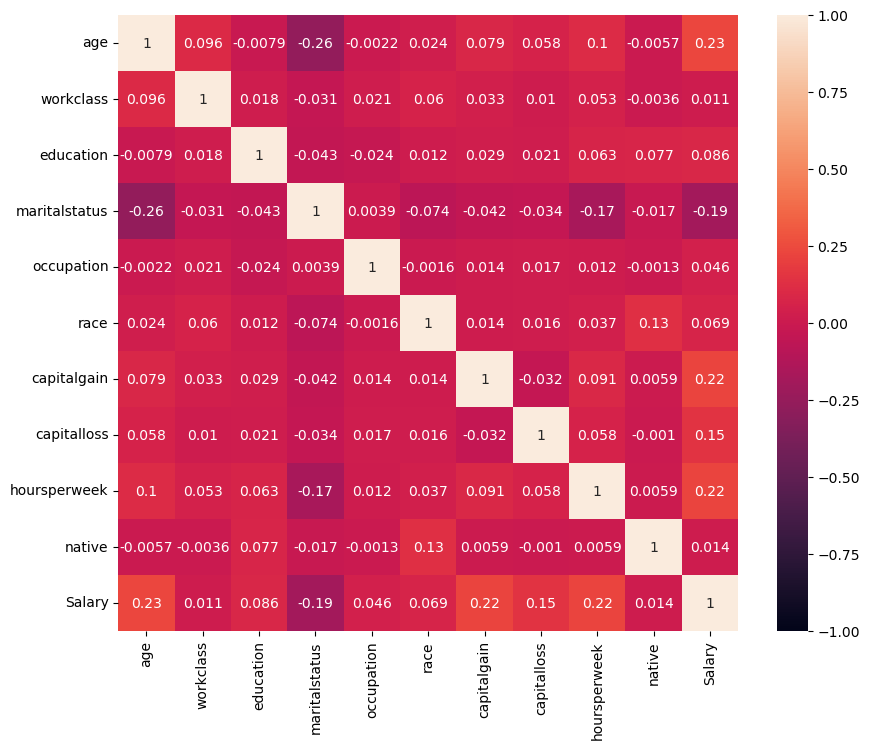

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(train_data.corr(),annot = True,vmin =-1,vmax = 1)
plt.show()

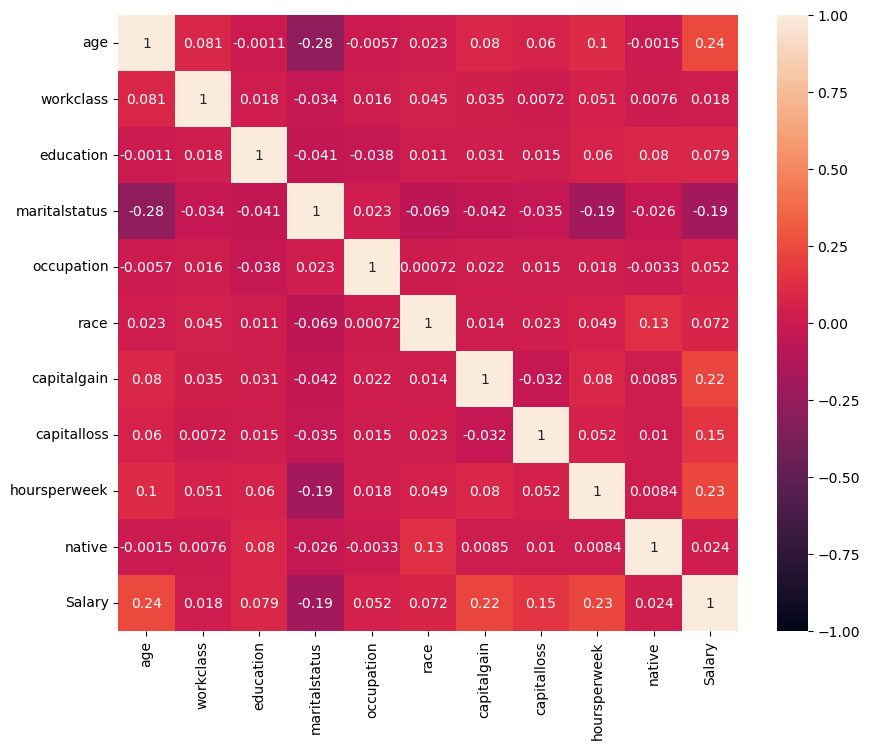

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(test_data.corr(),annot = True,vmin =-1,vmax = 1)
plt.show()

In [19]:
x_train = train_data.drop('Salary',axis=1)
y_train = train_data['Salary']
x_test = test_data.drop('Salary',axis=1)
y_test = test_data['Salary']

In [20]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred = GNB.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print('confusion matrix: \n',cm)
print('\nclassification report: \n',cr)
print('\naccuracy score: ',acc)

confusion matrix: 
 [[21511  1142]
 [ 5186  2322]]

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87     22653
           1       0.67      0.31      0.42      7508

    accuracy                           0.79     30161
   macro avg       0.74      0.63      0.65     30161
weighted avg       0.77      0.79      0.76     30161


accuracy score:  0.7901926328702629


In [24]:
# logistic model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
clf.fit(x_train, y_train)

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

In [26]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [27]:
test_pred = clf.predict(x_test)
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))

Precision = 0.69927
Accuracy = 0.79294


In [28]:
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

Recall = 0.29515
F1 score = 0.41510


In [29]:
print(confusion_matrix(y_test, test_pred))

[[21700   953]
 [ 5292  2216]]


In [30]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred= knn.predict(x_test)
y_pred

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 1])

In [32]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[19469,  3184],
       [ 2886,  4622]], dtype=int64)

In [33]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7987467259043135

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87     22653
           1       0.59      0.62      0.60      7508

    accuracy                           0.80     30161
   macro avg       0.73      0.74      0.73     30161
weighted avg       0.80      0.80      0.80     30161



In [34]:
# DECISION TREE model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred=dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8092901428997712

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     22653
           1       0.62      0.61      0.62      7508

    accuracy                           0.81     30161
   macro avg       0.75      0.74      0.74     30161
weighted avg       0.81      0.81      0.81     30161


 confussion matrix:
 [[19807  2846]
 [ 2900  4608]]


In [ ]:
# RANDOM FOREST model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=34,criterion='entropy',max_depth=5)
RF.fit(x_train,y_train)

In [ ]:
y_pred = RF.predict(x_test)
print(list(zip(y_test,y_pred)))

In [ ]:
y_pred_prob = RF.predict_proba(x_test)
print(list(y_pred_prob)) 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('confusion matrix: \n',cm)
print('\nclassification report:\n',cr)
print('\naccuracy score: ',acc)